In [1]:
from ANEMO import ANEMO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
from lmfit import  Model, Parameters
lmfit.__version__

'0.9.7'

In [2]:
import pickle
with open('../demo/result/param_Fit_AM.pkl', 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')
with open('../demo/data/enregistrement_AM_2017-10-23_100057.pkl', 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

In [3]:
def FIT(test, x, tau, maxi, latence, start_anti, v_anti, bino):
    
    model = Model(ANEMO.fct_exponentiel)
    params = Parameters()

    params.add('tau', value=tau[0], min=tau[1], max=tau[2])
    params.add('maxi', value=maxi[0], min=maxi[1], max=maxi[2])
    params.add('latence', value=latence[0], min=latence[1], max=latence[2])
    params.add('start_anti', value=start_anti[0], min=start_anti[1], max=start_anti[2])
    params.add('v_anti', value=v_anti[0], min=v_anti[1], max=v_anti[2])
    params.add('bino', value=bino, vary=False)

    result_deg = model.fit(test, params, x=x, fit_kws={'nan_policy': 'omit'})
    
    return result_deg

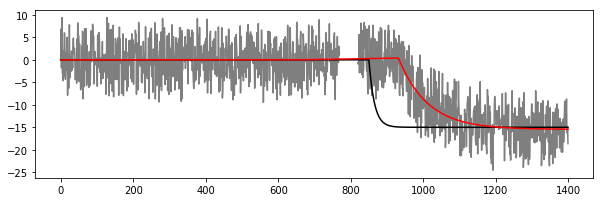

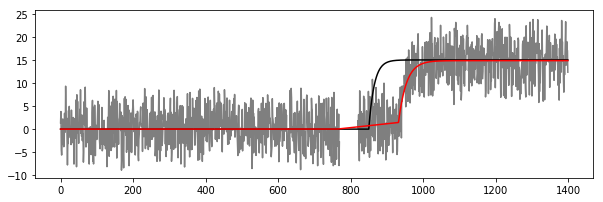

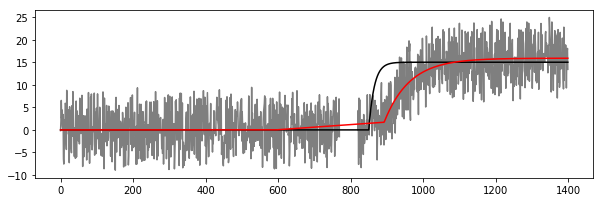

In [4]:
bruit = 10
x = np.arange(0,1400,1)

TargetOn, StimulusOf = 750, 750-300

start_anti_fit = [TargetOn-100,StimulusOf-200,TargetOn+75]
v_anti_fit = [0.,-40.,40.]
latence_fit = [TargetOn+100, TargetOn+75, len(x)]
tau_fit = [15.,13.,80.]
maxi_fit = [15.,1.,40.]

np.random.seed(7)
for trial in range(3) :
    #print('\n', trial)
    fig, axs = plt.subplots(1, 1, figsize=(10, (10*1/2)/1.6180))
    
    bino = exp['p'][trial][0][0]
    start_anti_true = param['start_anti'][0][trial]+TargetOn
    v_anti_true = param['v_anti'][0][trial]
    latence_true = param['latence'][0][trial]+TargetOn
    tau_true = param['tau'][0][trial]
    maxi_true = param['maxi'][0][trial]

    #print('bino', bino, 'start_anti', start_anti, 'v_anti', v_anti, 'latence', latence, 'tau', tau, 'maxi', maxi)

    test = ANEMO.fct_exponentiel(x, bino, start_anti_true, v_anti_true, latence_true,
                                 tau_true, maxi_true)+np.random.rand(len(x))*bruit
    test = test-np.random.rand(len(x))*bruit
    test[770:820] =  np.arange(0,50,1)*np.nan

    result_deg = FIT(test, x, tau_fit, maxi_fit, latence_fit, start_anti_fit, v_anti_fit, bino)

    plt.plot(test, c='k', alpha=0.5)
    plt.plot(result_deg.init_fit, c='k')
    plt.plot(result_deg.best_fit, c='r');
    #print(result_deg.values)

In [5]:
def plot(x, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit, bruit) :

    np.random.seed(7)
    fig, axs = plt.subplots(3, 2, figsize=(5*2, (5*3)/1.6180))

    for trial in range(25) :
        bino = exp['p'][trial][0][0]
        start_anti_true = param['start_anti'][0][trial]+TargetOn
        v_anti_true = param['v_anti'][0][trial]
        latence_true = param['latence'][0][trial]+TargetOn
        tau_true = param['tau'][0][trial]
        maxi_true = param['maxi'][0][trial]

        test = ANEMO.fct_exponentiel(x, bino, start_anti_true, v_anti_true, latence_true,
                                     tau_true, maxi_true)+np.random.rand(len(x))*bruit
        test = test-np.random.rand(len(x))*bruit
        test[770:820] =  np.arange(0,50,1)*np.nan


        result_deg = FIT(test, x, tau_fit, maxi_fit, latence_fit, start_anti_fit,
                         v_anti_fit, bino)

        axs[0][0].set_title('start_anti')
        axs[0][1].set_title('v_anti')
        axs[1][0].set_title('latence')
        axs[1][1].set_title('tau')
        axs[2][0].set_title('maxi')

        axs[0][0].scatter(start_anti_true, result_deg.values['start_anti'] , c='k', alpha=0.5)
        axs[0][1].scatter(v_anti_true, result_deg.values['v_anti'] , c='k', alpha=0.5)
        axs[1][0].scatter(latence_true, result_deg.values['latence'] , c='k', alpha=0.5)
        axs[1][1].scatter(tau_true, result_deg.values['tau'] , c='k', alpha=0.5)
        axs[2][0].scatter(maxi_true, result_deg.values['maxi'] , c='k', alpha=0.5)

## utilisation des paramêtres utiliser pour ANEMO

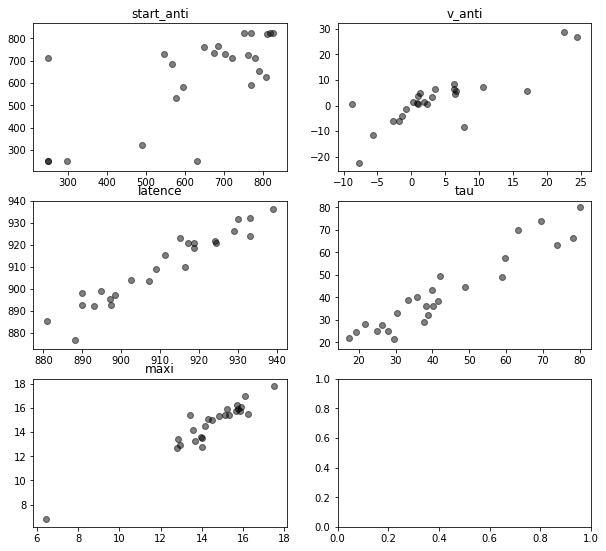

In [6]:
x = np.arange(0,1400,1)

TargetOn, StimulusOf = 750, 750-300

start_anti_fit = [TargetOn-100,StimulusOf-200,TargetOn+75]
v_anti_fit = [0.,-40.,40.]
latence_fit = [TargetOn+100, TargetOn+75, len(x)]
tau_fit = [15.,13.,80.]
maxi_fit = [15.,1.,40.]


plot(x, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit, bruit=10)

## Changement des paramêtres

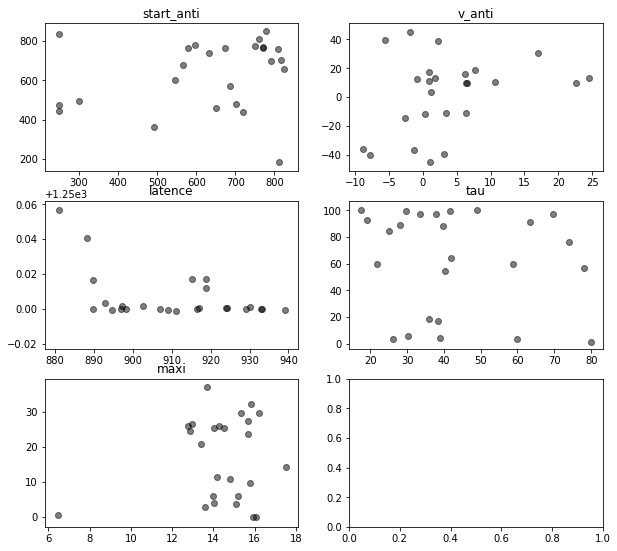

In [7]:
x = np.arange(0,1400,1)

TargetOn, StimulusOf = 750, 750-300

start_anti_fit = [TargetOn+100,StimulusOf-500,TargetOn+100]
v_anti_fit = [10.,-70.,70.]
latence_fit = [TargetOn+500, TargetOn+100, len(x)]
tau_fit = [1.,1.,100.]
maxi_fit = [30.,0.,80.]


plot(x, start_anti_fit, v_anti_fit, latence_fit, tau_fit, maxi_fit, bruit=10)